# King County Housing Analysis 

In [1]:
import numpy as np
import pandas as pd

In [2]:
housing = pd.read_csv("home_data.csv")
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**1. Data selection and summary statistics**

In [3]:
avrg_house_price = housing.groupby('zipcode')['price'].mean()

In [4]:
highest_avrg_house_price = avrg_house_price.idxmax()

In [5]:
print(f"This zipcode of Seattle has the highest average house sale price: {highest_avrg_house_price}")


This zipcode of Seattle has the highest average house sale price: 98039


In [6]:
houses_in_highest_avrg_zip = housing[housing['zipcode'] == highest_avrg_house_price]

In [7]:
average_price_highest_avg_zip = houses_in_highest_avrg_zip['price'].mean()
print(f"The average housing price in this zipcode: ${average_price_highest_avg_zip}")

The average housing price in this zipcode: $2160606.6


**2. Filtering data:**

In [8]:
selected_houses = housing[(housing['sqft_living'] > 2000) & (housing['sqft_living'] <= 4000)]

In [9]:
fraction_selected_houses = len(selected_houses) / len(housing)
print(f"The fraction of all houses that have sqft_living higher than 2000 sqft but no larger than 4000 sqft is: {fraction_selected_houses:.3f}")

The fraction of all houses that have sqft_living higher than 2000 sqft but no larger than 4000 sqft is: 0.422


**3. Visualization:**

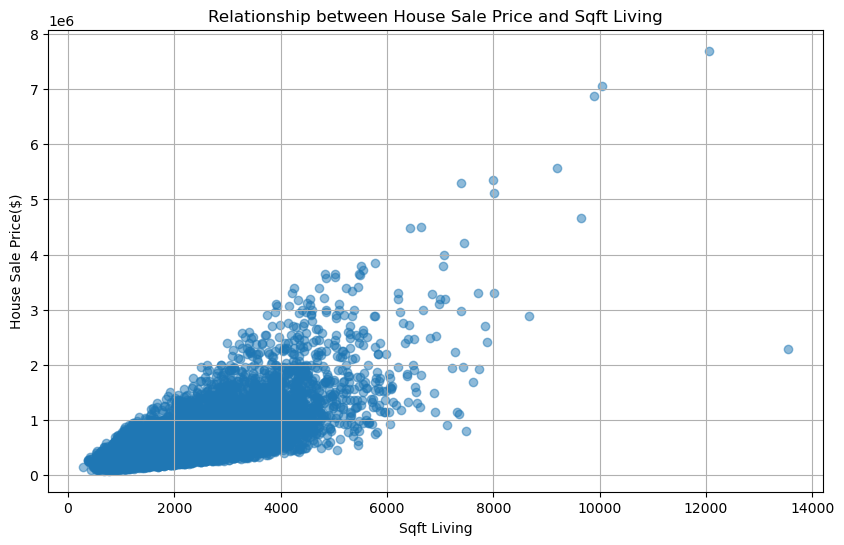

In [10]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(housing['sqft_living'], housing['price'], alpha=0.5)
plt.title('Relationship between House Sale Price and Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('House Sale Price($)')
plt.grid(True)
plt.show()


- We observe a positive correlation between House Sales price and Area. As the Sqft living area increases, the Sales Price also increases.

**4. Building regression models with different features (all models must be fit on the original sales dataset, not the one filtered on `sqft_living`. Do NOT split the data into training and test sets):**

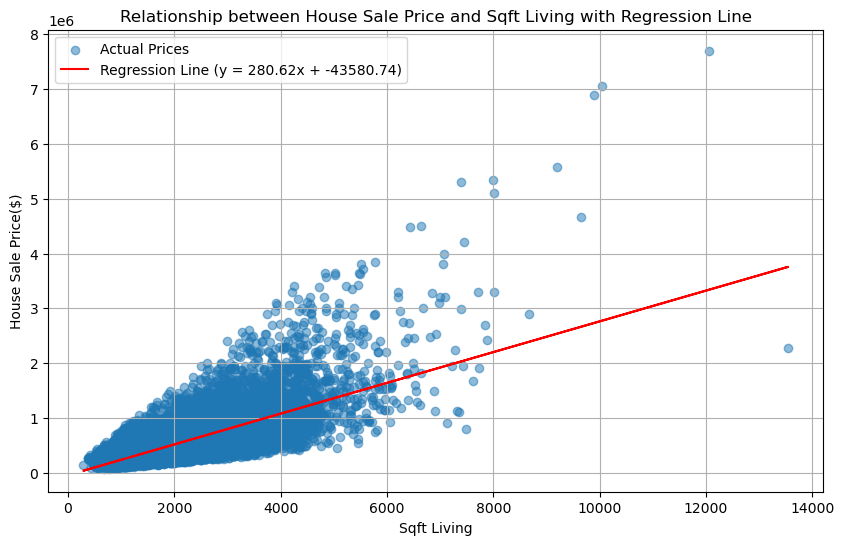

Intercept: -43580.74
Slope: 280.62
R-Square : 0.49


In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Extract features and target variable
X = housing['sqft_living'].values.reshape(-1, 1)
y = housing['price'].values

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Get the intercept and slope
intercept = model.intercept_
slope = model.coef_[0]
r_square = model.score(X,y)

# Predict house prices
predictions = model.predict(X)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Actual Prices')
plt.plot(X, predictions, color='red', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')
plt.title('Relationship between House Sale Price and Sqft Living with Regression Line')
plt.xlabel('Sqft Living')
plt.ylabel('House Sale Price($)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.2f}")
print(f"R-Square : {r_square:.2f}")


- We already observed a positive correlation between House Sales Price and Sqft Living Area. In this graph, we are plotting the regression line which shows Slope as 280.6 , Intercept as -43580.7 and R-squared as 0.49.

In [12]:
predicted_price = model.predict([[2650]])

print(f"The predicted price for a house with 2650 sqft is: ${predicted_price[0]:,.2f}")

The predicted price for a house with 2650 sqft is: $700,071.71


In [13]:
estimated_sqft = (800000 - intercept) / slope

print(f"The estimated square footage for a house costing $800,000 is: {estimated_sqft:.2f} sqft")

The estimated square footage for a house costing $800,000 is: 3006.09 sqft


In [14]:
# Extract features and target variable
X_bedrooms = housing['bedrooms'].values.reshape(-1, 1)
y_bedrooms = housing['price'].values

# Create a linear regression model for 'bedrooms'
model_bedrooms = LinearRegression()

# Fit the model
model_bedrooms.fit(X_bedrooms, y_bedrooms)

# Get the intercept and slope for 'bedrooms' feature
intercept_bedrooms = model_bedrooms.intercept_
slope_bedrooms = model_bedrooms.coef_[0]

print(f"Intercept for 'bedrooms': {intercept_bedrooms:.2f}")
print(f"Slope for 'bedrooms': {slope_bedrooms:.2f}")


Intercept for 'bedrooms': 129802.36
Slope for 'bedrooms': 121716.13


In [15]:
# Predict the price for a house with 3 bedrooms
predicted_price_bedrooms = model_bedrooms.predict([[3]])

print(f"The predicted price for a house with 3 bedrooms is: ${predicted_price_bedrooms[0]:,.2f}")

The predicted price for a house with 3 bedrooms is: $494,950.74


In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Predictions for the 'sqft_living' model
predictions_sqft = model.predict(X)

# Predictions for the 'bedrooms' model
predictions_bedrooms = model_bedrooms.predict(X_bedrooms)

# Compute RMSE for 'sqft_living' model
rmse_sqft = sqrt(mean_squared_error(y, predictions_sqft))

# Compute RMSE for 'bedrooms' model
rmse_bedrooms = sqrt(mean_squared_error(y_bedrooms, predictions_bedrooms))

print(f"RMSE for 'sqft_living' model: {rmse_sqft:.2f}")
print(f"RMSE for 'bedrooms' model: {rmse_bedrooms:.2f}")


RMSE for 'sqft_living' model: 261440.79
RMSE for 'bedrooms' model: 349230.15


# Breast Cancer Analysis using KNN

**1. Loading the breast cancer dataset ans importing the functions `load_breast_cancer` from
`sklearn.datasets`.**

In [17]:
# Importing the necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [18]:
# Loading the breast cancer dataset
breast_cancer_data = load_breast_cancer()

# Printing the first sample of the dataset
breast_cancer_data.data[0]


array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [19]:
#Converting in to dataframe
df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
# Printing the target variable of the dataset
df['target_names']= breast_cancer_data.target

In [21]:
df['target_names'].value_counts()

1    357
0    212
Name: target_names, dtype: int64

In [22]:
breast_cancer_data.data.shape
(569, 30)

(569, 30)

**2. Explanation of the data set**

It has 569 records with 30 features per record. That is too small to get a useful model, but good enough for learning. These are the features for each record in the data set.

**3. Features in the data set**

In [23]:
print(breast_cancer_data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


**4. Basic visualization of the data set**

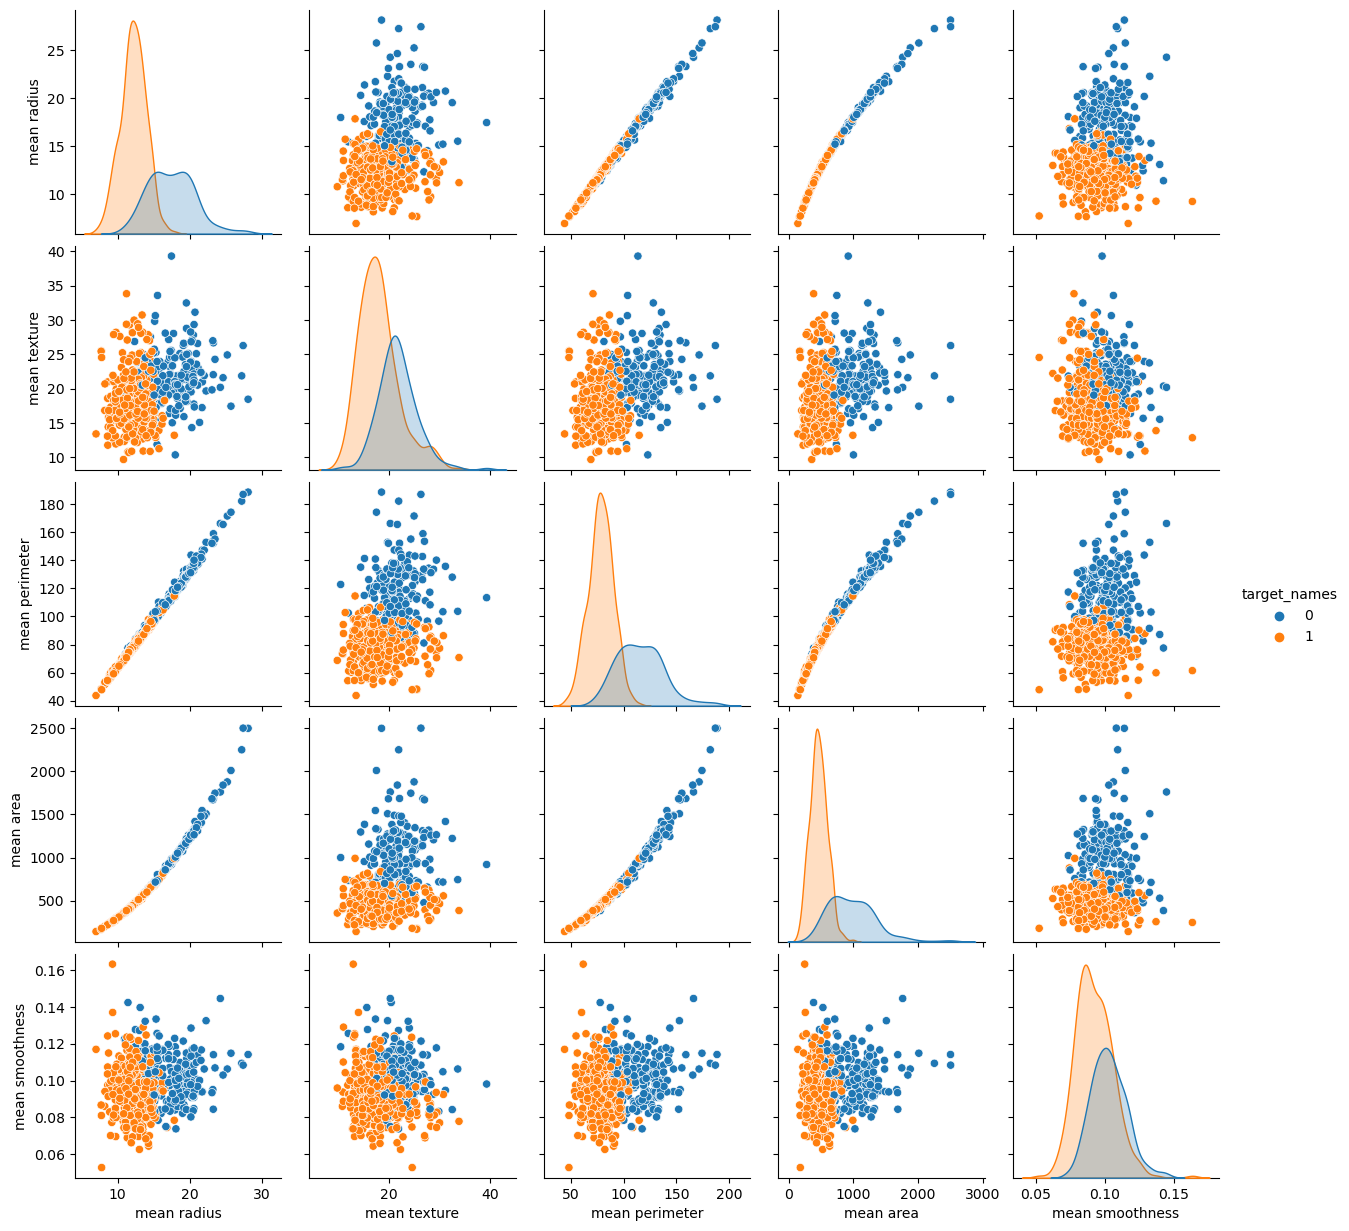

In [24]:
sns.pairplot(df,vars=['mean radius','mean texture','mean perimeter', 'mean area', 'mean smoothness'],hue='target_names')

- The pair plot provides an overview of relationships between the selected features, highlighting potential correlations or separations between variables. It helps identify which pairs of features might have stronger or weaker associations, contributing to the overall understanding of tumor characteristics.

- From the above graph we see that mean radius have a very high positive correlation with mean perimeter and mean area. Also, mean radius explains the target variable very well, mean radius less that 15 have more chances of getting the cancer.

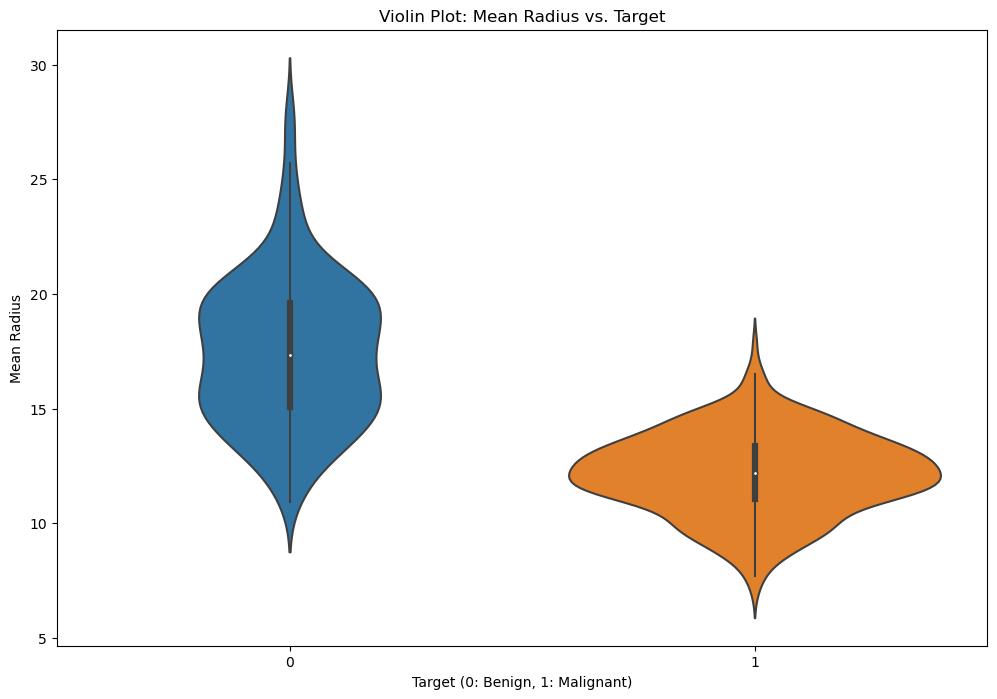

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'mean radius' and 'target' columns
plt.figure(figsize=(12, 8))
sns.violinplot(x='target_names', y='mean radius', data=df)
plt.title('Violin Plot: Mean Radius vs. Target')
plt.xlabel('Target (0: Benign, 1: Malignant)')
plt.ylabel('Mean Radius')
plt.show()

- we can see benign mean radius is of the range 8-31 and malignant is of the range 6-20
- mean_radius looks like good feature that can help us to distiguish between benign and malignant cancers

**5. Split the data into training set (80%) and test set (20%) using random_state = 0**

In [26]:
# Splitting the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 0)

# Printing the shapes of the training set and the validation set
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


**6. Building KNN models with n_neighbors = {1, 2, 3, 4, 5}**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Values of n_neighbors to try
n_neighbors_values = [1, 2, 3, 4, 5]

# Initialize dictionaries to store training and test accuracies for each n_neighbors
train_accuracies = {}
test_accuracies = {}

# Iterate through different values of n_neighbors
for n_neighbors in n_neighbors_values:
    # Create KNN model with the current n_neighbors value
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the model on the training set
    knn_model.fit(X_train, y_train)
    
    # Predictions on training set
    train_predictions = knn_model.predict(X_train)
    
    # Predictions on test set
    test_predictions = knn_model.predict(X_test)
    
    # Calculate accuracy on training set
    train_accuracy = accuracy_score(y_train, train_predictions)
    
    # Calculate accuracy on test set
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    # Store accuracies in dictionaries
    train_accuracies[n_neighbors] = train_accuracy
    test_accuracies[n_neighbors] = test_accuracy

# Print the accuracies
for n_neighbors in n_neighbors_values:
    print(f"n_neighbors = {n_neighbors}: Training Accuracy = {train_accuracies[n_neighbors]:.4f}, Test Accuracy = {test_accuracies[n_neighbors]:.4f}")

# Find the best model based on the highest test accuracy
best_n_neighbors = max(test_accuracies, key=test_accuracies.get)
print(f"\nThe best model has n_neighbors = {best_n_neighbors}.")

n_neighbors = 1: Training Accuracy = 1.0000, Test Accuracy = 0.9123
n_neighbors = 2: Training Accuracy = 0.9626, Test Accuracy = 0.8947
n_neighbors = 3: Training Accuracy = 0.9604, Test Accuracy = 0.9123
n_neighbors = 4: Training Accuracy = 0.9516, Test Accuracy = 0.9211
n_neighbors = 5: Training Accuracy = 0.9495, Test Accuracy = 0.9386

The best model has n_neighbors = 5.


Comparing their performance on the training set and test set: 


1. **n_neighbors = 1:**
   - **Training Accuracy = 1.0000:** The model perfectly fits the training data, as it considers only the nearest neighbor. However, this can lead to overfitting, as the model might be too sensitive to noise and outliers in the training set.
   - **Test Accuracy = 0.9123:** The test accuracy is slightly lower than the training accuracy, indicating some level of overfitting. The model may struggle to generalize well to unseen data.

2. **n_neighbors = 2:**
   - **Training Accuracy = 0.9626:** The model considers the two nearest neighbors, leading to a slightly more generalized representation compared to n_neighbors = 1. The training accuracy is high but not perfect.
   - **Test Accuracy = 0.8947:** The test accuracy is lower than the training accuracy, suggesting a moderate level of overfitting. The model might still be sensitive to variations in the training data.

3. **n_neighbors = 3:**
   - **Training Accuracy = 0.9604:** With three neighbors, the model generalizes a bit more, considering a small neighborhood. The training accuracy is high, and the model is expected to generalize better than n_neighbors = 2.
   - **Test Accuracy = 0.9123:** The test accuracy is reasonable but not the highest among the tested values. The model seems to perform well on the test set, indicating a balance between underfitting and overfitting.

4. **n_neighbors = 4:**
   - **Training Accuracy = 0.9516:** The model considers four neighbors, leading to a more generalized representation compared to smaller n_neighbors values. The training accuracy is slightly lower than n_neighbors = 3.
   - **Test Accuracy = 0.9211:** The test accuracy improves compared to n_neighbors = 2, suggesting a better generalization. The model seems to strike a good balance between complexity and generalization.

5. **n_neighbors = 5:**
   - **Training Accuracy = 0.9495:** The model considers five neighbors, leading to an even more generalized representation. The training accuracy is slightly lower than n_neighbors = 4.
   - **Test Accuracy = 0.9386:** This model achieves the highest test accuracy among the tested values. It generalizes well to unseen data, indicating that a slightly larger neighborhood improves performance.

As the number of neighbors increases, the model tends to generalize better to unseen data. However, too many neighbors may lead to underfitting. The choice of the optimal n_neighbors depends on finding a balance between capturing patterns in the data and avoiding overfitting. In this case, n_neighbors = 5 appears to strike a good balance with the highest test accuracy.